<a href="https://colab.research.google.com/github/fotrino/DMA_LAB2/blob/master/tutoriales/08_Ejemplo_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer
### Learn computer vision fundamentals with the famous MNIST data

Los datos son obtenidos de https://www.kaggle.com/c/digit-recognizer

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib notebook

Leemos los datos

In [2]:
X_train = pd.read_csv("https://github.com/Argentan/DMA_LAB2/blob/master/data/Digit_Recognizer.csv.zip?raw=true", compression='zip')
y_train = X_train.label
X_train = X_train.drop("label", axis=1)

In [3]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
28*28

784

In [5]:
X_train.shape

(42000, 784)

Distribución del Target

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


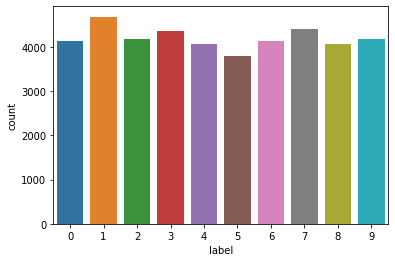

In [6]:
sns.countplot(y_train)

El valor máximo que puede tomar un pixel es

In [7]:
X_train.max().max()

255

Normalizamos los datos entre 0 y 1

In [8]:
X_train /= X_train.max().max()
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Hacemos un `reshape` al tamaño correct de las imagenes

In [9]:
X_train.values.reshape(-1,28,28,1).shape

(42000, 28, 28, 1)

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)

Imprimimos una imagen de ejemplo

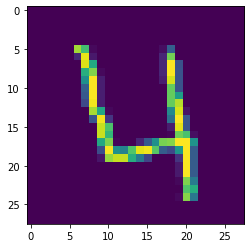

In [15]:
plt.imshow(X_train[3][:,:,0])

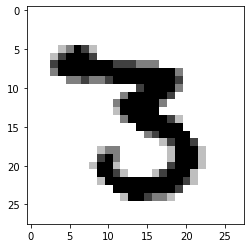

In [16]:
plt.imshow(X_train[13][:,:,0], cmap='binary')

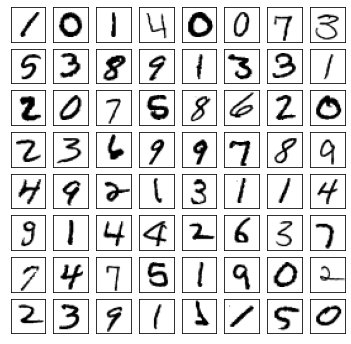

In [17]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i, :, :, 0], cmap='binary')
    axi.set(xticks=[], yticks=[])

Separamos en Train y Test

In [18]:
test_idx = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0] * 0.1), replace=False)
train_idx = [i for i in range(X_train.shape[0]) if i not in test_idx]
X_test = X_train[test_idx]
y_test = pd.get_dummies(y_train[test_idx])
X_train = X_train[train_idx]
y_train = pd.get_dummies(y_train[train_idx])

In [19]:
y_train.tail()

,0,1,2,3,4,5,6,7,8,9
41994,0,0,0,0,1,0,0,0,0,0
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41999,0,0,0,0,0,0,0,0,0,1


## Deep Neural Networks - Convolutional Neural Networks 

Un red neuronal "profunda" es aquella que tiene múltiples representaciones latentes que buscan extraer variables explicativas de bajo nivel y componerlas en capas superiores. Las redes convolucionales son un tipo de estas redes profundas, puntualmente utiles para la clasificacion de imagenes. 

###  Convolutional Neural Networks 


![](http://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png)


**Convolutional layer: ** Esta capa utiliza un filtro convolutivo para procesar partes de la imagen, el filtro consiste de coeficiente que se aplican sucesivamente a pedasos de la imagen.

![](https://gblobscdn.gitbook.com/assets%2F-LIA3amopGH9NC6Rf0mA%2F-M4bJ-IWAKzglR0XHFwU%2F-M4bJ4XuAd99mcti2Q2K%2Fconv_no_padding.gif?alt=media) 

**Tranco (stride): ** El tranco es la cantidad de pixeles que se saltean cada vez qeu se mueve el filtro.

**Padding: ** Margen que dejamos para ajustar el recuadro de la convolución

![](https://gblobscdn.gitbook.com/assets%2F-LIA3amopGH9NC6Rf0mA%2F-M4bJ-IWAKzglR0XHFwU%2F-M4bJ4XwDlK64zz3I0ZH%2Fconv_padding.gif?alt=media)

Que aprende la convolución?

![](https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif) 


**Pooling Layer:**  Esta capa se utiliza para filtrar variables menos importantes y disminuir la cantidad necesaria de parámetros totales. 

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)



Definimos el Modelo

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = X_train[0].shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [22]:
(3 * 3 + 1) * 32

320

Entrenamos el Modelo

In [23]:
model.fit(X_train, y_train, batch_size= 320 , epochs= 30, verbose= 1, validation_split=0.1,
          callbacks=[EarlyStopping(monitor='val_acc', patience=3,
                                   verbose=1, mode='auto', restore_best_weights=True)])

Epoch 1/30
107/107 [==============================] - 2s 19ms/step - loss: 0.7766 - accuracy: 0.7452 - val_loss: 0.1809 - val_accuracy: 0.9481
Epoch 2/30
107/107 [==============================] - 2s 15ms/step - loss: 0.2006 - accuracy: 0.9471 - val_loss: 0.1018 - val_accuracy: 0.9709
Epoch 3/30
107/107 [==============================] - 2s 15ms/step - loss: 0.1247 - accuracy: 0.9683 - val_loss: 0.0570 - val_accuracy: 0.9847
Epoch 4/30
107/107 [==============================] - 2s 15ms/step - loss: 0.0930 - accuracy: 0.9755 - val_loss: 0.1168 - val_accuracy: 0.9733
Epoch 5/30
107/107 [==============================] - 2s 15ms/step - loss: 0.0776 - accuracy: 0.9800 - val_loss: 0.0466 - val_accuracy: 0.9876
Epoch 6/30
107/107 [==============================] - 2s 15ms/step - loss: 0.0680 - accuracy: 0.9835 - val_loss: 0.0320 - val_accuracy: 0.9905
Epoch 7/30
107/107 [==============================] - 2s 15ms/step - loss: 0.0587 - accuracy: 0.9842 - val_loss: 0.0338 - val_accuracy: 0.9902

In [24]:
model.predict(X_test)

array([[1.1119055e-08, 2.7297288e-11, 1.0748023e-10, ..., 2.3504071e-10,
        5.2156179e-07, 9.6562121e-07],
       [9.9999976e-01, 9.7870876e-13, 4.7605657e-09, ..., 4.1244983e-11,
        2.0267070e-09, 1.0400431e-08],
       [2.7567816e-12, 1.0489018e-16, 3.1262639e-15, ..., 5.3229266e-15,
        6.9039302e-10, 1.5121305e-09],
       ...,
       [1.3924547e-09, 6.1874860e-13, 8.1540382e-12, ..., 1.1434908e-11,
        1.2627126e-07, 1.5000634e-07],
       [1.7401140e-16, 1.8189213e-15, 1.7344730e-10, ..., 9.0797370e-11,
        6.5859290e-11, 7.5281378e-12],
       [2.9147485e-12, 1.6914910e-10, 7.7824239e-08, ..., 9.9999976e-01,
        1.5949837e-11, 7.2238485e-08]], dtype=float32)

Evaluamos la Predicción

In [25]:
preds = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test.idxmax(axis=1), preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,406,0,0,0,0,0,0,0,1,0
1,0,441,0,0,0,0,0,1,0,0
2,2,0,418,0,0,0,0,0,1,0
3,0,0,0,436,0,1,0,0,0,0
4,0,0,1,0,394,0,0,0,0,0
5,1,0,0,0,0,354,1,0,1,1
6,1,0,0,0,0,1,441,0,1,0
7,1,1,0,0,3,0,0,468,0,0
8,1,0,2,0,0,0,1,0,399,2


## Aumentar el Dataset con transformaciones de Imagenes

In [26]:
X_train.shape

(37800, 28, 28, 1)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,  # Rotar aleatoriamente la imagen en un 10%
        zoom_range = 0.1, # Hace zoom aleatoriamente la imagen en un 10%
        width_shift_range=0.1,  # Hacer las imagenes aleatoriamente un 10% más anchas
        height_shift_range=0.1,  # Hacer las imagenes aleatoriamente un 10% más altas
        horizontal_flip=False,  # Rotar Horizontalmente
        vertical_flip=False)  # Rotar Verticalmente


datagen.fit(X_train)

In [28]:
X_train.shape

(37800, 28, 28, 1)

In [29]:
model.fit_generator(datagen.flow(X_train,y_train, batch_size=320),
                              epochs = 30, verbose = 1, steps_per_epoch= X_train.shape[0] // 320)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
118/118 [==============================] - 9s 76ms/step - loss: 0.1774 - accuracy: 0.9562
Epoch 2/30
118/118 [==============================] - 9s 75ms/step - loss: 0.1157 - accuracy: 0.9710
Epoch 3/30
118/118 [==============================] - 9s 75ms/step - loss: 0.0970 - accuracy: 0.9755
Epoch 4/30
118/118 [==============================] - 9s 75ms/step - loss: 0.0895 - accuracy: 0.9781
Epoch 5/30
118/118 [==============================] - 9s 74ms/step - loss: 0.0836 - accuracy: 0.9793
Epoch 6/30
118/118 [==============================] - 9s 74ms/step - loss: 0.0760 - accuracy: 0.9809
Epoch 7/30
118/118 [==============================] - 9s 73ms/step - loss: 0.0745 - accuracy: 0.9813
Epoch 8/30
118/118 [==============================] - 9s 74ms/step - loss: 0.0703 - accuracy: 0.9819
Epoch 9/30
118/118 [==============================] - 9s 73ms/step - loss: 0.0697 - accuracy: 0.9821
Epoch 10/30
118

In [30]:
preds = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test.idxmax(axis=1), preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,407,0,0,0,0,0,0,0,0,0
1,0,438,1,0,0,1,0,2,0,0
2,0,0,420,0,0,0,0,0,1,0
3,0,0,0,437,0,0,0,0,0,0
4,0,0,0,0,393,0,1,0,0,1
5,1,0,0,0,0,354,1,0,2,0
6,2,0,0,0,0,0,441,0,1,0
7,1,2,3,1,1,0,0,465,0,0
8,1,0,0,0,0,0,0,0,404,0


## Aplicar un Modelo Pre-entrenado 

Vamos a utilizar `resnet50` como una capa de nuestra red

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

new_model = Sequential()
new_model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))
new_model.add(Dense(y_train.shape[1], activation='softmax'))
new_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

In [ ]:
new_model.fit(np.repeat(X_train, 3, -1), y_train, batch_size=320, epochs=30, verbose=1, validation_split=0.1,
              callbacks=[EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto', restore_best_weights=True)])